# Demo 1: Análisis Básico de Datos E-commerce

En esta demostración, aprenderemos a realizar un análisis básico de datos de e-commerce usando pandas.

In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 11.0/11.0 MB 64.8 MB/s  0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -------------------------------------- - 12.3/12.8 MB 59.9 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 52.0 MB/s  0:00:00
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   -------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install matplotlib numpy seaborn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd

In [3]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualización
plt.style.use('Solarize_Light2')
%matplotlib inline

# Configurar opciones de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('Bibliotecas importadas correctamente')

Bibliotecas importadas correctamente


In [4]:
# Crear dataset de ejemplo
np.random.seed(42)  # Para reproducibilidad

# Crear datos de ventas
data = {
    'fecha': pd.date_range('2024-01-01', periods=100),
    'producto': np.random.choice(['Laptop', 'Smartphone', 'Tablet', 'Smartwatch'], 100),
    'categoria': np.random.choice(['Electrónica', 'Accesorios'], 100),
    'precio': np.random.uniform(100, 1000, 100).round(2),
    'cantidad': np.random.randint(1, 5, 100),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], 100)
}

# Crear DataFrame
df = pd.DataFrame(data)


In [5]:
df

,fecha,producto,categoria,precio,cantidad,region
0,2024-01-01,Tablet,Electrónica,128.29,4,Este
1,2024-01-02,Smartwatch,Accesorios,672.77,4,Norte
2,2024-01-03,Laptop,Accesorios,382.92,3,Norte
3,2024-01-04,Tablet,Accesorios,557.71,1,Oeste
4,2024-01-05,Tablet,Accesorios,916.81,4,Este
...,...,...,...,...,...,...
95,2024-04-05,Smartphone,Accesorios,414.29,3,Oeste
96,2024-04-06,Smartphone,Accesorios,753.36,3,Norte
97,2024-04-07,Smartwatch,Accesorios,907.40,4,Este
98,2024-04-08,Smartphone,Electrónica,898.38,1,Oeste


## 1. Exploración Inicial de Datos

In [6]:
# Información básica del DataFrame
print('Información del DataFrame:')
df.info()

print('\nEstadísticas descriptivas:')
df.describe()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      100 non-null    datetime64[ns]
 1   producto   100 non-null    object        
 2   categoria  100 non-null    object        
 3   precio     100 non-null    float64       
 4   cantidad   100 non-null    int32         
 5   region     100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 4.4+ KB

Estadísticas descriptivas:


,fecha,precio,cantidad
count,100,100.00,100.00
mean,2024-02-19 12:00:00,548.05,2.57
min,2024-01-01 00:00:00,106.26,1.00
25%,2024-01-25 18:00:00,317.81,1.00
50%,2024-02-19 12:00:00,555.06,3.00
75%,2024-03-15 06:00:00,789.57,4.00
max,2024-04-09 00:00:00,987.09,4.00
std,NaN,263.80,1.21


In [7]:

print('\nValores únicos por columna:')
for columna in ['producto', 'categoria', 'region']:
    print(f'\n{columna.title()}:')
    print(df[columna].value_counts())


Valores únicos por columna:

Producto:
producto
Smartwatch    30
Smartphone    26
Tablet        24
Laptop        20
Name: count, dtype: int64

Categoria:
categoria
Electrónica    56
Accesorios     44
Name: count, dtype: int64

Region:
region
Sur      31
Oeste    25
Este     24
Norte    20
Name: count, dtype: int64


## 2. Análisis de Ventas

In [17]:
df.head(3)

,fecha,producto,categoria,precio,cantidad,region
0,2024-01-01,Tablet,Electrónica,128.29,4,Este
1,2024-01-02,Smartwatch,Accesorios,672.77,4,Norte
2,2024-01-03,Laptop,Accesorios,382.92,3,Norte


In [18]:
# Calcular ventas
df['ventas'] = df['precio'] * df['cantidad']

df.head(3)

,fecha,producto,categoria,precio,cantidad,region,ventas
0,2024-01-01,Tablet,Electrónica,128.29,4,Este,513.16
1,2024-01-02,Smartwatch,Accesorios,672.77,4,Norte,2691.08
2,2024-01-03,Laptop,Accesorios,382.92,3,Norte,1148.76


In [19]:

# Análisis por categoría
print('Análisis de ventas por categoría:')
ventas_categoria = df.groupby('categoria').agg({
    'ventas': ['sum', 'mean', 'count'],
    'cantidad': 'sum'
}).round(2)

display(ventas_categoria)


Análisis de ventas por categoría:


ventas               cantidad
                 sum    mean count      sum
categoria                                  
Accesorios  64126.94 1457.43    44      115
Electrónica 70589.14 1260.52    56      142

In [20]:

# Análisis por producto
print('\nVentas por producto:')
ventas_producto = df.groupby('producto')['ventas'].sum().sort_values(ascending=False)
display(ventas_producto)


Ventas por producto:


producto
Smartwatch   39440.71
Smartphone   33688.53
Laptop       32617.95
Tablet       28968.89
Name: ventas, dtype: float64

## 3. Análisis Temporal

In [21]:
# Análisis temporal
ventas_diarias = df.groupby('fecha')['ventas'].sum()
ventas_promedio = ventas_diarias.mean()

# Calcular tendencia con promedio móvil
tendencia = ventas_diarias.rolling(window=7).mean()


In [24]:
tendencia

fecha
2024-01-01       NaN
2024-01-02       NaN
2024-01-03       NaN
2024-01-04       NaN
2024-01-05       NaN
               ...  
2024-04-05    836.90
2024-04-06   1114.38
2024-04-07   1527.88
2024-04-08   1526.57
2024-04-09   1854.74
Name: ventas, Length: 100, dtype: float64

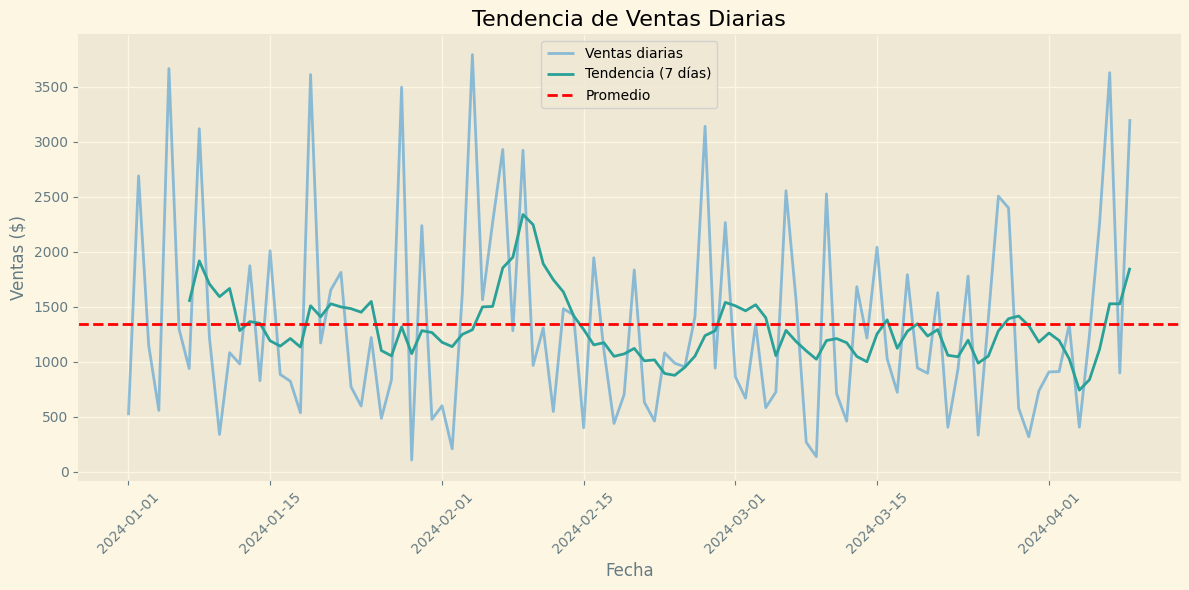

In [25]:

# Visualizar tendencia
plt.figure(figsize=(12, 6))
plt.plot(ventas_diarias.index, ventas_diarias.values, label='Ventas diarias', alpha=0.5)
plt.plot(tendencia.index, tendencia.values, label='Tendencia (7 días)', linewidth=2)
plt.axhline(y=ventas_promedio, color='r', linestyle='--', label='Promedio')

plt.title('Tendencia de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Análisis de Distribución

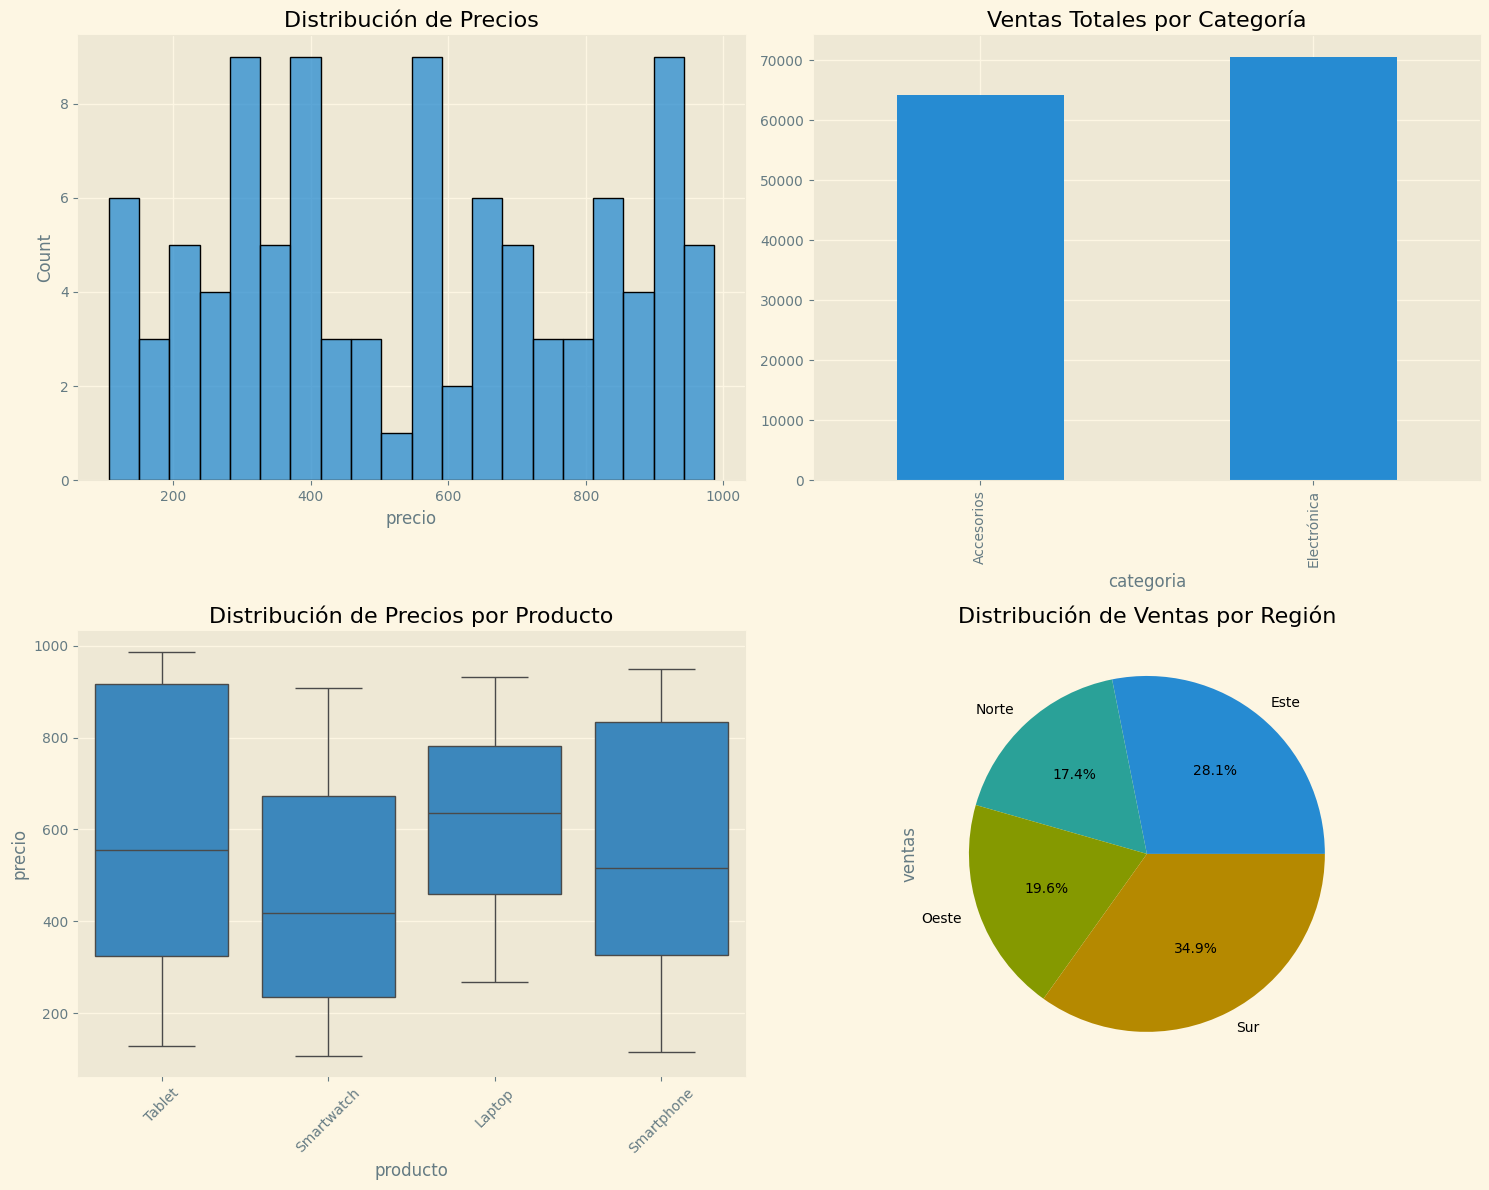

In [26]:
# Crear subplot con diferentes visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribución de precios
sns.histplot(data=df, x='precio', bins=20, ax=axes[0,0])
axes[0,0].set_title('Distribución de Precios')

# 2. Ventas por categoría
df.groupby('categoria')['ventas'].sum().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Ventas Totales por Categoría')

# 3. Box plot de precios por producto
sns.boxplot(data=df, x='producto', y='precio', ax=axes[1,0])
axes[1,0].set_title('Distribución de Precios por Producto')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Ventas por región
df.groupby('region')['ventas'].sum().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Distribución de Ventas por Región')

plt.tight_layout()
plt.show()

## 5. KPIs y Métricas Clave

In [27]:
# Calcular KPIs
kpis = {
    'Venta Total': df['ventas'].sum(),
    'Ticket Promedio': df['ventas'].mean(),
    'Cantidad Total Vendida': df['cantidad'].sum(),
    'Número de Transacciones': len(df),
    'Precio Promedio': df['precio'].mean()
}


In [28]:
kpis

{'Venta Total': np.float64(134716.08),
 'Ticket Promedio': np.float64(1347.1607999999999),
 'Cantidad Total Vendida': np.int64(257),
 'Número de Transacciones': 100,
 'Precio Promedio': np.float64(548.0488)}

In [29]:

# Crear DataFrame con KPIs
kpis_df = pd.DataFrame(kpis.items(), columns=['Métrica', 'Valor'])
kpis_df['Valor'] = kpis_df['Valor'].round(2)

print('KPIs Principales:')
display(kpis_df)

# Top 5 días con mayores ventas
print('\nTop 5 días con mayores ventas:')
display(ventas_diarias.sort_values(ascending=False).head())

KPIs Principales:


,Métrica,Valor
0,Venta Total,134716.08
1,Ticket Promedio,1347.16
2,Cantidad Total Vendida,257.00
3,Número de Transacciones,100.00
4,Precio Promedio,548.05



Top 5 días con mayores ventas:


fecha
2024-02-04   3794.48
2024-01-05   3667.24
2024-04-07   3629.60
2024-01-19   3613.20
2024-01-28   3498.64
Name: ventas, dtype: float64